# Decision Trees y Random Forest con Python y scikit-learn

En el campo del **aprendizaje automático**, los **árboles de decisión (Decision Trees)** y los **bosques aleatorios (Random Forest)** son dos de las herramientas más comunes y poderosas utilizadas para la **clasificación** y la **predicción**. En este artículo, exploraremos **qué son exactamente estos modelos, cómo funcionan** y cómo podemos **implementarlos en nuestro propio proyecto individual** utilizando **Scikit-Learn**, una **biblioteca de aprendizaje automático de código abierto en Python**.

Antes de adentrarnos en los detalles de la construcción y entrenamiento de modelos de árboles de decisión y bosques aleatorios con Scikit-Learn, es necesario tener conocimientos previos:

- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)

- Conocimiento de de regresión [lineal](https://deepnote.com/@mazzaroli/Regresion-Lineal-con-Python-y-scikit-learn-86f7bb72-770c-4e28-9e84-0355aed93892) y [logística](https://deepnote.com/@mazzaroli/Regresion-Logistica-con-Python-y-scikit-learn-cd6b9628-59c3-4496-8abc-8beb77d9b4ff).


## ¿Qué son los árboles de decisión?

Los [**árboles de decisión**](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) son un **modelo de aprendizaje automático supervisado** que se utiliza tanto para la **clasificación como para la regresión.** Son ampliamente extendidos debido a su **simplicidad, facilidad de interpretación y versatilidad** en diversas aplicaciones.

Los árboles de decisión aprenden de los datos generando **reglas de tipo if-else y divisiones conocidas como nodos.** Cada nodo representa una **pregunta sobre los datos** y cada rama del árbol representa una **respuesta a esa pregunta**. El proceso continúa hasta que se llega a una **hoja del árbol, que representa la predicción final.**

Existen varios **algoritmos** que pueden utilizarse para construir árboles de decisión, como **ID3, C4.5** y **CART**. Las primeras versiones de los árboles de decisión fueron propuestas por **[Leo Breiman](https://es.wikipedia.org/wiki/Leo_Breiman)** en la década de 1980.

Los árboles de decisión se utilizan comúnmente en **tareas de clasificación**, como la **detección de spam en el correo electrónico** o la **clasificación de clientes en grupos de segmentación de mercado**. También se utilizan en **tareas de regresión**, como la **predicción de precios de bienes raíces**.

#### Ejemplo

Supongamos que queremos decidir si comprar o no un coche usado. El árbol de decisión podría ser el siguiente:

- *¿El coche tiene menos de 5 años?*
    - **Sí:** ¿El coche tiene menos de 50,000 km?
        - **Sí:** Comprar el coche.
        - **No:** No comprar el coche.
    - **No:** ¿El coche tiene menos de 80,000 km?
        - **Sí:** Comprar el coche.
        - **No:** No comprar el coche.
        
Este árbol tiene dos nodos, con **cada nodo representando una pregunta** y **cada rama representando una posible respuesta**. En función de las respuestas a las preguntas, se llega a una hoja que indica si se debe comprar o no el coche usado.

## Tu primer árbol de decisión con scikit-learn
Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [71]:
# Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

In [72]:
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv', sep=',')

### Análisis de datos para tu primer árbol de decisión

#### Atributos

El conjunto de datos Titanic de CS109 contiene 887 filas y 8 columnas.

1. **Survived (Sobrevivió):** indica si el pasajero sobrevivió al hundimiento del Titanic (0 = No, 1 = Sí).

1. **Pclass (Clase de pasajero):** indica la clase del pasajero (1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase).

1. **Name (Nombre):** el nombre completo del pasajero.

1. **Sex (Género):** el género del pasajero (Masculino o Femenino).

1. **Age (Edad):** la edad del pasajero en años.

1. **Siblings/Spouses Aboard (Hermanos/Cónyuges a bordo):** el número de hermanos/cónyuges del pasajero que también estaban a bordo del Titanic.

1. **Parents/Children Aboard (Padres/Hijos a bordo):** el número de padres/hijos del pasajero que también estaban a bordo del Titanic.

1. **Fare (Tarifa):** la tarifa pagada por el pasajero por su viaje en el Titanic.

In [73]:
# Visualizacion del Dataframe
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Se eliminará la columna **"Fare"** ya que esta información está altamente correlacionada con la columna **"Pclass"** que nos indica la lase social del pasajero. Además, se eliminará la columna "Name" ya que no es relevante para el análisis que se realizará.

> ⚠\
> **Antes de eliminar cualquier columna** de un conjunto de datos, **es importante tener una comprensión completa de los datos** y el objetivo del análisis. Además, siempre **es recomendable consultar con otros expertos o interesados** en los datos para asegurarse **de que no se está eliminando información importante** o relevante.\
> ⚠
>
> las columnas **"Fare"** y **"Name"** en el dataset Titanic de CS109 **contienen información importante.** La columna "Fare" representa el precio del billete pagado por cada pasajero, lo que puede ser útil para analizar la relación entre la tarifa y la clase de pasajero. Por otro lado, la columna "Name" contiene información sobre el nombre de cada pasajero, que podría ser útil para el análisis de patrones de nombres o la búsqueda de información adicional sobre individuos específicos. Sin embargo, **en el contexto de un análisis específico de la supervivencia de los pasajeros en el Titanic, estas columnas pueden no ser relevantes** y por lo tanto podrían ser eliminadas para simplificar el conjunto de datos.

In [74]:
# Eliminamos las columnas que no nos interesan
titanic.drop(
    ['Name', 'Fare'], 
    axis=1,
    inplace=True)

In [75]:
# Renombramos las columnas Siblings/Spouses Aboard	y Parents/Children Aboard por SibSp y ParCh 
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh']
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [76]:
# Analizamos el shape del objeto
titanic.shape

(887, 6)

In [77]:
# Visualizamos los tipos de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Sex       887 non-null    object 
 3   Age       887 non-null    float64
 4   SibSp     887 non-null    int64  
 5   ParCh     887 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.7+ KB


In [78]:
# Cambiamos los tipos de datos de Sex
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

In [79]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
ParCh         int64
Sex_male      uint8
dtype: object

In [80]:
titanic.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [81]:
# Renombramos columna Sex_male a Sex
titanic.rename(columns={'Sex_male':'Sex'},inplace=True)

- Sex = 1 = Male
- Sex = 0 = Female

In [82]:
# Ordenar colummas por nombres
titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','ParCh']]
titanic

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
882,0,2,1,27.0,0,0
883,1,1,0,19.0,0,0
884,0,3,0,7.0,1,2
885,1,1,1,26.0,0,0


### Entrenamiento de árbol de decisión con scikit-learn

In [83]:
# Vemos la proporcion del a variable objetivo
titanic.Survived.value_counts(normalize=True)

0    0.614431
1    0.385569
Name: Survived, dtype: float64

In [84]:
# importamos libreria para balancear los datos
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [85]:
# Separamos en X e y
X = titanic.drop('Survived', axis=1)
y = titanic.Survived

In [86]:
# Balanceamos los datos
X_over, y_over = undersample.fit_resample(X,y)
y_over.value_counts(normalize=True)


0    0.5
1    0.5
Name: Survived, dtype: float64

In [111]:
# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.30, random_state=42)

In [112]:
# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.7908687943262411


In [113]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [114]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

### Evaluacion del modelo

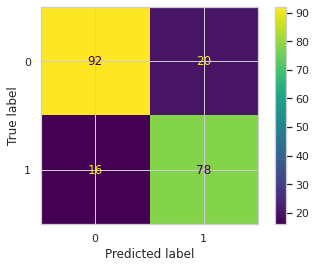

In [115]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [116]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred))


El accuracy en train es: 0.8179916317991632
El accuracy en test es: 0.8252427184466019


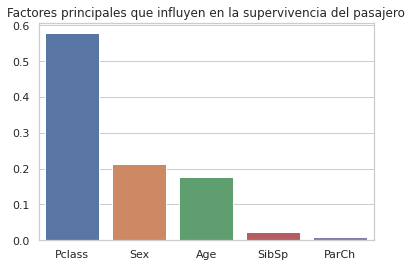

In [135]:
# Verificamos el feature importances
importances = grid_search.best_estimator_.feature_importances_
importances = np.sort(importances)[::-1]
columns = X.columns

sns.barplot(x=columns, y=importances);
plt.title('Factores principales que influyen en la supervivencia del pasajero');

- Podemos observar que para la clasificación del modelo en base a la variable target: **Survived**, los **features más importantes** son: **Sex**, seguido de **Pclass** y luego de **Age**. 
 
- **SibSp** y **ParCh no tienen un impacto significativo** en la capacidad del modelo para predecir la variable objetivo, **se podrían eliminar sin afectar la capacidad de predicción**.

- Es importante destacar que se observa una performance parecida en la métrica de **Accuracy** para los datos de **Train** y de **Test**, lo cual es claramente positivo para nuestro modelo. 

## ¿Cómo funcionan los árboles de decisión?

Los árboles de decisión son un tipo de **modelo de aprendizaje supervisado** que se utilizan para **clasificar o predecir valores numéricos**. En resumen, los árboles de decisión toman un conjunto de datos de entrada, lo dividen en subconjuntos basados en diferentes atributos y, finalmente, hacen una predicción sobre el valor de salida.

Por ejemplo, considera el siguiente conjunto de datos que describe varios productos que se venden en una tienda en línea:

|Producto|Precio|	Descuento|	En Oferta|
|--------|------|----------|-----------|
|A	      |10	 |0.05	   |Sí         |
|B	      |20	 |0.10	   |No         |
|C	      |30	 |0.20	   |Sí         |
|D	      |15	 |0.15	   |Sí         |
|E	      |25	 |0.10	   |No         |

En este caso, queremos construir un árbol de decisión que nos permita **predecir si un producto estará en oferta o no, en función de sus características.**

Comenzamos por construir el **nodo raíz**, que representa el conjunto completo de datos. A continuación, seleccionamos un atributo para dividir el conjunto de datos. En este caso, podríamos elegir el atributo **"Precio"** como nuestra primera división.

Supongamos que elegimos un umbral de $20 para el precio, lo que significa que cualquier producto con un precio mayor a $20 se considerará "caro" y cualquier producto con un precio menor o igual a $20 se considerará "barato". La primera división del árbol quedaría así:

```java
                     Precio <= 20
                    /            \
         Sí (Producto Barato)  No (Producto Caro) 
```
El árbol de decisión tiene dos ramas: una rama para los productos baratos y otra para los productos caros. La rama para los productos baratos conduce a un **nodo de hoja** que indica que el producto A está en oferta. La rama para los productos caros conduce a otro **nodo de decisión**, que utiliza el descuento para decidir si el producto está en oferta o no.

Supongamos que elegimos un umbral de descuento del 15%. Entonces, el árbol de decisión completo quedaría así:

```java
                     Precio <= 20
                    /            \
         Sí (Producto Barato)  No (Producto Caro) 
                  /                       \
      (Descuento <= 3%)              (Descuento <= 15%)
      /            \                  /                \
Sí (Sin oferta)  No (En oferta)    Sí (Sin oferta)  No (En oferta)
```
Este árbol nos permite **predecir si un producto está en oferta o no en función de su precio y su descuento.**

<img src='https://blog.mindmanager.com/wp-content/uploads/2022/03/Decision-Tree-Diagram-Example-MindManager-Blog.png' width=500>

### Terminología de los árboles de decisión

Aquí está la terminología comúnmente utilizada en los árboles de decisión:

- **Nodo raíz:** Es el primer nodo del árbol de decisión y no tiene un nodo padre. Representa el conjunto de datos completo y es el punto de partida para la construcción del árbol.

- **División:** Es la separación de un conjunto de datos en subconjuntos más pequeños y homogéneos en función de un atributo determinado. Cada división genera un nuevo nodo y una nueva rama en el árbol.

- **Nodo de decisión:** Es un nodo interno del árbol que representa una característica del conjunto de datos y tiene al menos dos ramas que indican las posibles opciones para esa característica.

- **Nodo de hoja:** Es un nodo terminal del árbol que no tiene más ramas y representa una etiqueta de clase o una predicción para el conjunto de datos de entrada.

- **Poda (pruning):** Es un proceso de eliminación de nodos innecesarios del árbol para evitar el sobreajuste (overfitting) del modelo y mejorar su capacidad de generalización. La poda se realiza después de construir el árbol y puede ser prepruning o postpruning.

- **Rama:** Es una conexión entre dos nodos del árbol que representa una opción posible para un atributo determinado.

- **Nodo madre/padre:** Es el nodo inmediatamente anterior a un nodo específico en el árbol. Un nodo puede tener varios nodos hijos, pero solo tiene un nodo padre.

- **Hijo:** Es un nodo inmediatamente posterior a un nodo específico en el árbol. Un nodo puede tener varios nodos hijos, pero solo tiene un nodo padre.


## ¿Cuándo usar árboles de decisión?

### Ventajas

- **Algoritmo de caja blanca:** los árboles de decisión son considerados [algoritmos de caja blanca](https://es.wikipedia.org/wiki/Caja_blanca_(sistemas)), lo que significa que son modelos fácilmente interpretables y comprensibles por los humanos.

- **Resultados fáciles de interpretar y entender:** como se mencionó anteriormente, los árboles de decisión son modelos fáciles de interpretar y entender, ya que cada paso en el proceso de toma de decisiones se representa explícitamente. Esto permite que los expertos del dominio puedan validar el modelo y dar sugerencias para mejorarlo.

- **Las combinaciones de los mismos pueden dar resultados muy certeros:** los árboles de decisión individuales pueden ser limitados en términos de precisión de predicción. Sin embargo, una técnica que se utiliza para mejorar la precisión de los árboles de decisión es la combinación de varios árboles en un conjunto, como en el caso de Random Forest. Esto se conoce como ensamblaje de modelos y puede proporcionar una mayor precisión en las predicciones.

### Desventajas

- **Tendencia al sobreajuste u overfitting:** los árboles de decisión tienen una tendencia natural a sobreajustarse o overfitting, lo que significa que pueden ajustarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de **poda** o **regularización**.

- **Influencia de los outliers:** los outliers o valores atípicos pueden tener una influencia significativa en la creación de los árboles de decisión, ya que pueden sesgar la partición de los datos. Una solución a esto es utilizar técnicas de **preprocesamiento de datos** para tratar con los outliers antes de crear el árbol.

- **Arboles demasiado complejos pueden no adaptarse bien a los nuevos datos:** si se crean árboles de decisión demasiado complejos, pueden adaptarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de **poda** o **regularización** para simplificar el árbol.

- **Posibilidad de crear árboles sesgados si una clase es más numerosa:** si una clase es significativamente más numerosa que las demás clases, el árbol de decisión puede estar sesgado hacia esa clase mayoritaria y no prestar suficiente atención a las otras clases. Esto se puede prevenir mediante técnicas de **balanceo** de clases, como el **muestreo estratificado** o el **aumento de datos**.

### ¿Cuándo usar árboles de decisión?

- **Sencillo y fácil de entender:** los árboles de decisión son una técnica sencilla y fácil de interpretar. Por lo tanto, es recomendable utilizarlos cuando se busca una solución clara y fácil de entender. Además, la estructura de árbol es intuitiva y fácil de visualizar, lo que hace que el proceso de toma de decisiones sea más fácil de entender.

- **Funcionan bastante bien con grandes conjuntos de datos:** los árboles de decisión pueden funcionar muy bien con grandes conjuntos de datos. A medida que el tamaño del conjunto de datos aumenta, los árboles de decisión se vuelven más útiles, ya que pueden segmentar el conjunto de datos en grupos más pequeños y más manejables para un análisis más profundo.

- **Relativamente robusto:** los árboles de decisión son relativamente robustos y pueden manejar datos faltantes o ruidosos. Además, son útiles en situaciones en las que se necesitan resultados precisos con una alta tasa de precisión.

- **Método útil para analizar datos cuantitativos:** los árboles de decisión son particularmente útiles para analizar datos cuantitativos. Por ejemplo, en el análisis de negocios, los árboles de decisión pueden ayudar a identificar patrones en grandes conjuntos de datos y hacer recomendaciones basadas en esa información.

- **Aplicable para clasificación y regresión:** los árboles de decisión se pueden utilizar para problemas de clasificación y regresión. En problemas de clasificación, se utiliza para asignar una etiqueta a un objeto, mientras que en problemas de regresión, se utiliza para predecir una variable continua.

# Proyecto práctico: árboles de decisión